In [2]:
%pip install librosa
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
audio_path = "sample_music/bensound-dubstep.mp3"
# Returns the amplitudes of each sample of the audio file and its sample rate
music_array, sample_rate = librosa.load(audio_path, sr=44100)

In [5]:
print(music_array, sample_rate)

[-2.1696414e-06 -2.5462875e-06 -1.8293757e-05 ... -9.5046766e-04
 -1.0499838e-03 -8.0458110e-04] 44100


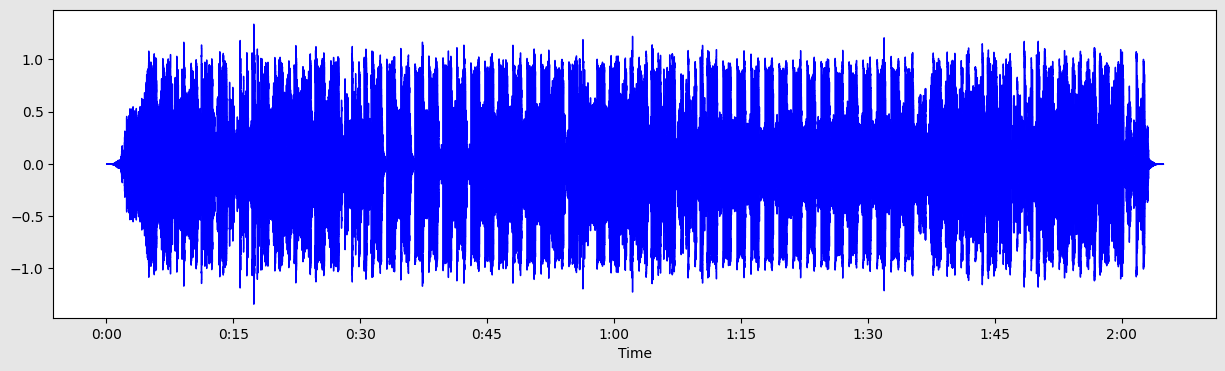

In [14]:
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(music_array, sr=sample_rate, color='blue')

# Spectrogram Visualization
- A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. 
- Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. 
- When the data is represented in a 3D plot, they may be called waterfalls. 
- In 2-dimensional arrays, the first axis is frequency while the second axis is time.

In [7]:
# STFT is a technique to analyze the frequency content of a signal as it changes over time
X = librosa.stft(music_array)
Xdb = librosa.amplitude_to_db(abs(X))

In [8]:
print(Xdb, Xdb.shape)

[[-2.72536278e+01 -2.72536278e+01 -2.72536278e+01 ...  2.16878988e-02
  -1.09747455e-01 -2.57594109e+00]
 [-2.72536278e+01 -2.72536278e+01 -2.72536278e+01 ... -5.98630047e+00
  -5.90138006e+00 -5.64622974e+00]
 [-2.72536278e+01 -2.72536278e+01 -2.72536278e+01 ... -2.72536278e+01
  -2.72536278e+01 -1.55829058e+01]
 ...
 [-2.72536278e+01 -2.72536278e+01 -2.72536278e+01 ... -2.72536278e+01
  -2.72536278e+01 -2.72536278e+01]
 [-2.72536278e+01 -2.72536278e+01 -2.72536278e+01 ... -2.72536278e+01
  -2.72536278e+01 -2.72536278e+01]
 [-2.72536278e+01 -2.72536278e+01 -2.72536278e+01 ... -2.72536278e+01
  -2.72536278e+01 -2.72536278e+01]] (1025, 10758)


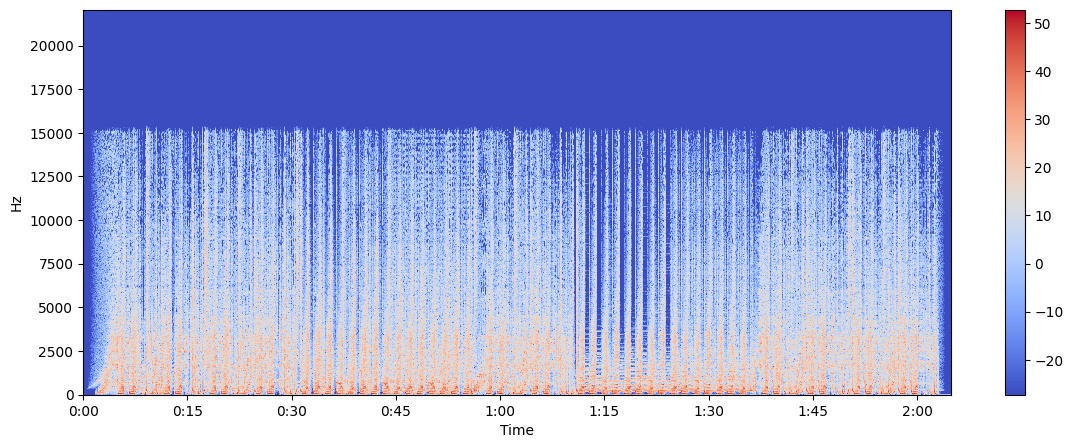

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

## The Graph 
- The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 
- Since all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.
     - Frequencies are often displayed on a logarithmic scale because human perception of pitch is also logarithmic. This means that equal intervals on a logarithmic frequency scale correspond to equal ratios of perceived pitch.

     - By setting the y_axis parameter to 'log', the vertical axis of the spectrogram will be scaled logarithmically, which can make it easier to visualize and interpret the frequency content of the audio signal, especially when dealing with a wide range of frequencies.

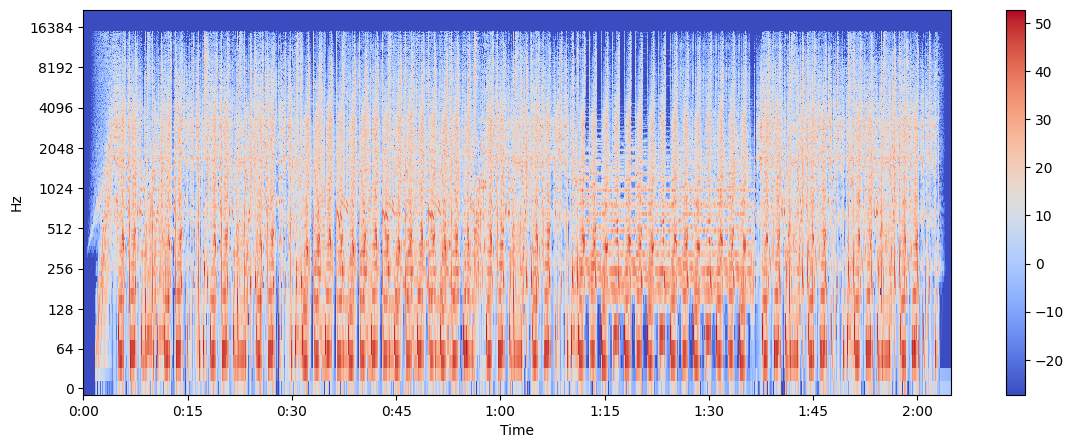

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

## Tempo

In [11]:
tempo, beat_frames = librosa.beat.beat_track(y=music_array, sr=sample_rate)
print(f'Estimated Tempo: {round(tempo, 2)} beats per minute')

Estimated Tempo: 72.79 beats per minute


## Frames:
- Frames correspond to short windows of the signal (y), each separated by hop_length = 512 samples. 
- librosa uses centered frames, so that the kth frame is centered around sample k * hop_length.

In [12]:
# Converts the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate)
print(beat_times)

[  5.81659864   6.64090703   7.46521542   8.30113379   9.12544218
   9.94975057  10.76244898  11.59836735  12.43428571  13.2585941
  14.09451247  14.89560091  15.74312925  16.56743764  17.39174603
  18.2276644   19.06358277  19.87628118  20.71219955  21.53650794
  22.36081633  23.19673469  24.02104308  24.84535147  25.68126984
  26.50557823  27.32988662  28.15419501  28.9785034   29.80281179
  30.63873016  31.46303855  32.29895692  33.12326531  33.95918367
  34.78349206  35.60780045  36.43210884  37.26802721  38.08072562
  38.91664399  39.74095238  40.57687075  41.40117914  42.22548753
  43.04979592  43.88571429  44.71002268  45.53433107  46.35863946
  47.19455782  48.01886621  48.85478458  49.67909297  50.50340136
  51.32770975  52.16362812  52.98793651  53.8122449   54.63655329
  55.47247166  56.29678005  57.13269841  57.94539683  58.78131519
  59.60562358  60.42993197  61.26585034  62.09015873  62.91446712
  63.73877551  64.5630839   65.39900227  66.22331066  67.04761905
  67.871927

(-1.0, 1.0)

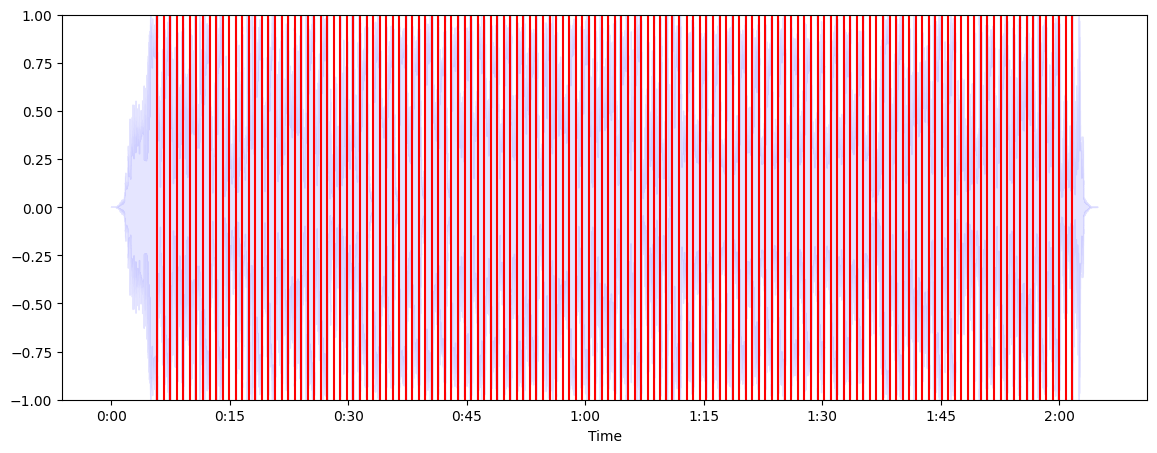

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(music_array, sr=sample_rate, color='blue', alpha=0.1)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)